In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Đọc dữ liệu trong 2 ngày: 1/2/2007 - 2/2/2007

In [2]:
'''
dict_dtypes = {
    "Date" : "object",
    "Time": "object",
    "Global_active_power": "object",
    "Global_reactive_power": "object",
    "Voltage": "object",
    "Global_intensity": "object",
    "Sub_metering_1": "object",
    "Sub_metering_2": "object",
    "Sub_metering_3": "object"
}

electric_df = pd.read_csv('household_power_consumption.txt',sep = ';',dtype = dict_dtypes)
electric_df.Date = pd.to_datetime(electric_df.Date, format = '%d/%m/%Y')

electric_df.loc[(electric_df.Date >= '2007-2-1')&(electric_df.Date <= '2007-2-2'),:].reset_index().drop('index',axis = 1).to_csv('electric.csv', index = False)
'''

'\ndict_dtypes = {\n    "Date" : "object",\n    "Time": "object",\n    "Global_active_power": "object",\n    "Global_reactive_power": "object",\n    "Voltage": "object",\n    "Global_intensity": "object",\n    "Sub_metering_1": "object",\n    "Sub_metering_2": "object",\n    "Sub_metering_3": "object"\n}\n\nelectric_df = pd.read_csv(\'household_power_consumption.txt\',sep = \';\',dtype = dict_dtypes)\nelectric_df.Date = pd.to_datetime(electric_df.Date, format = \'%d/%m/%Y\')\n\nelectric_df.loc[(electric_df.Date >= \'2007-2-1\')&(electric_df.Date <= \'2007-2-2\'),:].reset_index().drop(\'index\',axis = 1).to_csv(\'electric.csv\', index = False)\n'

In [3]:
electric_df = pd.read_csv('electric.csv')
electric_df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2007-02-01,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
1,2007-02-01,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
2,2007-02-01,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
3,2007-02-01,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
4,2007-02-01,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2875,2007-02-02,23:55:00,3.696,0.226,240.90,15.2,0.0,1.0,18.0
2876,2007-02-02,23:56:00,3.698,0.226,241.02,15.2,0.0,2.0,18.0
2877,2007-02-02,23:57:00,3.684,0.224,240.48,15.2,0.0,1.0,18.0
2878,2007-02-02,23:58:00,3.658,0.220,239.61,15.2,0.0,1.0,17.0


In [4]:
electric_df.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

Convert thành float được, tức là ko có dữ liệu '?' ở mấy cột này

In [5]:
electric_df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [6]:
(electric_df.loc[:,'Time'] == '?').any()

False

In [16]:
(electric_df.loc[:,'Date'] == '?').any()

False

In [12]:
electric_df.Time = pd.to_datetime(electric_df.Time, format = '%H:%M:%S').dt.time
electric_df.Date = pd.to_datetime(electric_df.Date, format = '%Y-%m-%d')

In [13]:
electric_df.Date = pd.to_datetime(electric_df.Date, format = '%Y-%m-%d')

In [14]:
electric_df.dtypes

Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [15]:
electric_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2007-02-01,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
1,2007-02-01,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
2,2007-02-01,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
3,2007-02-01,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
4,2007-02-01,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0


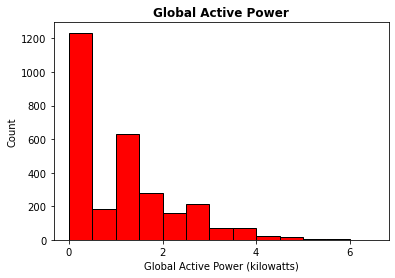

In [46]:
plt.hist(electric_df['Global_active_power'],bins = np.arange(0,7,0.5),edgecolor='black',color = 'red')
plt.title('Global Active Power', fontweight='bold')
plt.xticks(np.arange(0,7,2))
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Count')
plt.show()

In [26]:
np.arange(0,7,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5])